In [1]:
import os

import torch
import torch.nn.functional as F
from torchvision import datasets, transforms
import dionysus as dion
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

from pt_activation.models.simple_mnist_sigmoid import CFF

%load_ext autoreload
%autoreload 2

In [2]:
def create_filtrations(model, batch_size, up_to):
    device = torch.device("cpu")
    kwargs = {'num_workers': 1, 'pin_memory': True}
    test_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=False, download=True, transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])), batch_size=batch_size, shuffle=False, **kwargs)

    model.eval()
    test_loss = 0
    correct = 0
    t = 0
    res_df = []
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output, hiddens = model(data, hiddens=True)
            test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
            pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()
            for s in range(data.shape[0]):
                # check if this makes sense
                this_hiddens = [hiddens[0][s], hiddens[1][s], hiddens[2][s]]
                print('Filtration: {}'.format(s+t))
                f = model.compute_dynamic_filtration(data[s,0], this_hiddens)
                #
                row = {'filtration':f, 'loss':output.cpu().numpy()[s][0], 'class':target.cpu().numpy()[s], 'prediction':pred.cpu().numpy()[s][0]}
                res_df.append(row)

            t += batch_size
            if t >= up_to:
                break

    return pd.DataFrame(res_df)

In [3]:
model_location = '/home/tgebhart/projects/pt_activation/logdir/models/cff_3-filters_8-kernel_size_50-fc1_sigmoid-activation.pt'
model = CFF()
model.load_state_dict(torch.load(model_location))

In [4]:
res_df = create_filtrations(model, 50, 1000)

Filtration: 0
filtration size 85921
Sorting filtration...
Filtration: 1
filtration size 91206
Sorting filtration...
Filtration: 2
filtration size 78073
Sorting filtration...
Filtration: 3
filtration size 100130
Sorting filtration...
Filtration: 4
filtration size 87241
Sorting filtration...
Filtration: 5
filtration size 80703
Sorting filtration...
Filtration: 6
filtration size 88554
Sorting filtration...
Filtration: 7
filtration size 87680
Sorting filtration...
Filtration: 8
filtration size 94806
Sorting filtration...
Filtration: 9
filtration size 96078
Sorting filtration...
Filtration: 10
filtration size 94617
Sorting filtration...
Filtration: 11
filtration size 94823
Sorting filtration...
Filtration: 12
filtration size 90526
Sorting filtration...
Filtration: 13
filtration size 95043
Sorting filtration...
Filtration: 14
filtration size 81428
Sorting filtration...
Filtration: 15
filtration size 88158
Sorting filtration...
Filtration: 16
filtration size 90114
Sorting filtration...
Filtra

filtration size 93906
Sorting filtration...
Filtration: 139
filtration size 91742
Sorting filtration...
Filtration: 140
filtration size 85337
Sorting filtration...
Filtration: 141
filtration size 85759
Sorting filtration...
Filtration: 142
filtration size 89020
Sorting filtration...
Filtration: 143
filtration size 79424
Sorting filtration...
Filtration: 144
filtration size 90670
Sorting filtration...
Filtration: 145
filtration size 78386
Sorting filtration...
Filtration: 146
filtration size 96488
Sorting filtration...
Filtration: 147
filtration size 102086
Sorting filtration...
Filtration: 148
filtration size 91251
Sorting filtration...
Filtration: 149
filtration size 86001
Sorting filtration...
Filtration: 150
filtration size 89849
Sorting filtration...
Filtration: 151
filtration size 95649
Sorting filtration...
Filtration: 152
filtration size 86695
Sorting filtration...
Filtration: 153
filtration size 86811
Sorting filtration...
Filtration: 154
filtration size 77614
Sorting filtratio

filtration size 91369
Sorting filtration...
Filtration: 276
filtration size 81862
Sorting filtration...
Filtration: 277
filtration size 100493
Sorting filtration...
Filtration: 278
filtration size 95064
Sorting filtration...
Filtration: 279
filtration size 75853
Sorting filtration...
Filtration: 280
filtration size 92702
Sorting filtration...
Filtration: 281
filtration size 92189
Sorting filtration...
Filtration: 282
filtration size 87725
Sorting filtration...
Filtration: 283
filtration size 81495
Sorting filtration...
Filtration: 284
filtration size 89510
Sorting filtration...
Filtration: 285
filtration size 90306
Sorting filtration...
Filtration: 286
filtration size 89296
Sorting filtration...
Filtration: 287
filtration size 92760
Sorting filtration...
Filtration: 288
filtration size 82103
Sorting filtration...
Filtration: 289
filtration size 86894
Sorting filtration...
Filtration: 290
filtration size 96968
Sorting filtration...
Filtration: 291
filtration size 94588
Sorting filtratio

filtration size 101982
Sorting filtration...
Filtration: 413
filtration size 95597
Sorting filtration...
Filtration: 414
filtration size 86229
Sorting filtration...
Filtration: 415
filtration size 87173
Sorting filtration...
Filtration: 416
filtration size 81669
Sorting filtration...
Filtration: 417
filtration size 89295
Sorting filtration...
Filtration: 418
filtration size 91181
Sorting filtration...
Filtration: 419
filtration size 76070
Sorting filtration...
Filtration: 420
filtration size 82589
Sorting filtration...
Filtration: 421
filtration size 89985
Sorting filtration...
Filtration: 422
filtration size 89512
Sorting filtration...
Filtration: 423
filtration size 90531
Sorting filtration...
Filtration: 424
filtration size 93987
Sorting filtration...
Filtration: 425
filtration size 92243
Sorting filtration...
Filtration: 426
filtration size 84830
Sorting filtration...
Filtration: 427
filtration size 78580
Sorting filtration...
Filtration: 428
filtration size 91892
Sorting filtratio

filtration size 100838
Sorting filtration...
Filtration: 550
filtration size 85144
Sorting filtration...
Filtration: 551
filtration size 85506
Sorting filtration...
Filtration: 552
filtration size 101916
Sorting filtration...
Filtration: 553
filtration size 96468
Sorting filtration...
Filtration: 554
filtration size 91130
Sorting filtration...
Filtration: 555
filtration size 85575
Sorting filtration...
Filtration: 556
filtration size 99450
Sorting filtration...
Filtration: 557
filtration size 92410
Sorting filtration...
Filtration: 558
filtration size 90911
Sorting filtration...
Filtration: 559
filtration size 100572
Sorting filtration...
Filtration: 560
filtration size 85989
Sorting filtration...
Filtration: 561
filtration size 90628
Sorting filtration...
Filtration: 562
filtration size 86784
Sorting filtration...
Filtration: 563
filtration size 89660
Sorting filtration...
Filtration: 564
filtration size 88862
Sorting filtration...
Filtration: 565
filtration size 88208
Sorting filtrat

filtration size 91583
Sorting filtration...
Filtration: 687
filtration size 85294
Sorting filtration...
Filtration: 688
filtration size 90960
Sorting filtration...
Filtration: 689
filtration size 82176
Sorting filtration...
Filtration: 690
filtration size 91601
Sorting filtration...
Filtration: 691
filtration size 97407
Sorting filtration...
Filtration: 692
filtration size 86543
Sorting filtration...
Filtration: 693
filtration size 94819
Sorting filtration...
Filtration: 694
filtration size 88710
Sorting filtration...
Filtration: 695
filtration size 78628
Sorting filtration...
Filtration: 696
filtration size 79594
Sorting filtration...
Filtration: 697
filtration size 91390
Sorting filtration...
Filtration: 698
filtration size 90966
Sorting filtration...
Filtration: 699
filtration size 85629
Sorting filtration...
Filtration: 700
filtration size 81549
Sorting filtration...
Filtration: 701
filtration size 106688
Sorting filtration...
Filtration: 702
filtration size 85410
Sorting filtratio

filtration size 102933
Sorting filtration...
Filtration: 824
filtration size 78628
Sorting filtration...
Filtration: 825
filtration size 89566
Sorting filtration...
Filtration: 826
filtration size 80921
Sorting filtration...
Filtration: 827
filtration size 84296
Sorting filtration...
Filtration: 828
filtration size 89166
Sorting filtration...
Filtration: 829
filtration size 91476
Sorting filtration...
Filtration: 830
filtration size 85115
Sorting filtration...
Filtration: 831
filtration size 80847
Sorting filtration...
Filtration: 832
filtration size 85771
Sorting filtration...
Filtration: 833
filtration size 91588
Sorting filtration...
Filtration: 834
filtration size 90164
Sorting filtration...
Filtration: 835
filtration size 78483
Sorting filtration...
Filtration: 836
filtration size 80993
Sorting filtration...
Filtration: 837
filtration size 87851
Sorting filtration...
Filtration: 838
filtration size 91274
Sorting filtration...
Filtration: 839
filtration size 99783
Sorting filtratio

filtration size 84203
Sorting filtration...
Filtration: 961
filtration size 93426
Sorting filtration...
Filtration: 962
filtration size 83962
Sorting filtration...
Filtration: 963
filtration size 76963
Sorting filtration...
Filtration: 964
filtration size 76842
Sorting filtration...
Filtration: 965
filtration size 92676
Sorting filtration...
Filtration: 966
filtration size 89007
Sorting filtration...
Filtration: 967
filtration size 80293
Sorting filtration...
Filtration: 968
filtration size 86614
Sorting filtration...
Filtration: 969
filtration size 85774
Sorting filtration...
Filtration: 970
filtration size 86291
Sorting filtration...
Filtration: 971
filtration size 93733
Sorting filtration...
Filtration: 972
filtration size 97373
Sorting filtration...
Filtration: 973
filtration size 95285
Sorting filtration...
Filtration: 974
filtration size 94776
Sorting filtration...
Filtration: 975
filtration size 94069
Sorting filtration...
Filtration: 976
filtration size 88478
Sorting filtration

In [5]:
res_df.head()

,class,filtration,loss,prediction
0,7,"[(355), (947), (355, 947), (231), (232), (233)...",-7.636029,7
1,2,"[(149), (150), (151), (155), (156), (177), (18...",-9.216976,2
2,1,"[(406), (984), (406, 984), (240), (295), (323)...",-4.820250,1
3,0,"[(262), (412), (547), (875), (990), (1090), (2...",-0.010659,0
4,4,"[(299), (905), (299, 905), (300), (327), (437)...",-13.980286,4


In [6]:
sample_graphs = []
for s in range(res_df.shape[0]):
    print(s)
    subgraphs = {}
    f = res_df['filtration'].iloc[s]
    try:
        m = dion.homology_persistence(f)
    except RuntimeError:
        print(f)
        continue
    dgms = dion.init_diagrams(m,f)
    for i,c in enumerate(m):
        if len(c) == 2:
            if f[c[0].index][0] in subgraphs:
                subgraphs[f[c[0].index][0]].add_edge(f[c[0].index][0],f[c[1].index][0],weight=f[i].data)
            else:
                eaten = False
                for k, v in subgraphs.items():
                    if v.has_node(f[c[0].index][0]):
                        v.add_edge(f[c[0].index][0], f[c[1].index][0], weight=f[i].data)
                        eaten = True
                        break
                if not eaten:
                    g = nx.Graph()
                    g.add_edge(f[c[0].index][0], f[c[1].index][0], weight=f[i].data)
                    subgraphs[f[c[0].index][0]] = g
                    
    sample_graphs.append(subgraphs)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [7]:
res_df[res_df['prediction'] != res_df['class']]

,class,filtration,loss,prediction
18,3,"[(257), (870), (257, 870), (147), (148), (149)...",-4.821723,5
33,4,"[(490), (1047), (490, 1047), (179), (207), (23...",-6.051050,6
39,1,"[(657), (658), (1172), (1173), (657, 1172), (6...",-8.517385,8
59,5,"[(269), (458), (882), (1022), (269, 882), (458...",-1.543367,7
73,9,"[(186), (820), (186, 820), (185), (209), (210)...",-7.604838,7
80,7,"[(345), (937), (345, 937), (233), (261), (266)...",-7.296918,9
96,1,"[(434), (1005), (434, 1005), (293), (322), (35...",-7.085238,8
97,7,"[(231), (851), (231, 851), (203), (830), (203,...",-11.533482,8
115,4,"[(291), (325), (346), (353), (380), (381), (40...",-7.610735,8
119,2,"[(208), (209), (835), (836), (208, 835), (209,...",-6.387572,7


In [8]:
# options = {
#     'node_color': 'red',
#     'node_size': 2,
#     'width': 3,
#     'with_labels':True}
# nx.draw_random(subgraphs[243], **options)

In [9]:
ids = model.layerwise_ids()
ids

[range(0, 784), range(784, 2107), range(2107, 2157), range(2157, 2167)]

In [16]:
goi = 0

In [17]:
print(sample_graphs[goi].keys())

dict_keys([355, 231, 232, 233, 234, 264, 266, 267, 268, 271, 272, 300, 382, 410, 437, 492, 547, 574, 601, 602, 629, 656, 657, 684, 685, 711, 712, 327, 519, 269, 409, 465, 683, 235, 520, 383, 299, 354, 270, 263, 265, 628, 230, 546, 575, 713, 328, 464, 573, 236, 237, 238, 239, 240, 241, 242, 243, 438, 203, 493, 244, 204, 205, 739, 273, 2123, 2108, 740, 2146, 738])


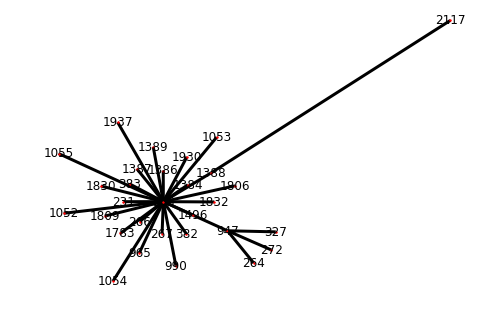

In [20]:
options = {
    'node_color': 'red',
    'node_size': 2,
    'width': 3,
    'with_labels':True}
nx.draw_spring(sample_graphs[goi][355], **options)

In [ ]:
gois = [sample_graphs[goi][k] for k in sample_graphs[goi].keys()]

In [ ]:
all_goi = nx.compose_all(gois)

In [ ]:
options = {
    'node_color': 'red',
    'node_size': 2,
    'width': 2,
    'with_labels':True}
nx.draw_spring(all_goi, **options)

In [21]:
take = -1
edges = set()
for i in range(len(sample_graphs)):
    for k in list(sample_graphs[i].keys())[:take]:
        for x in sample_graphs[i][k].edges(data=True):
            edge_name = str(x[0])+'-'+str(x[1])
            edges.add(edge_name)

In [22]:
edf = pd.DataFrame(np.zeros((len(sample_graphs),len(edges))), columns=list(edges))
for i in range(len(sample_graphs)):
    print('Sample: {}/{}'.format(i,len(sample_graphs)))
    for k in list(sample_graphs[i].keys())[:take]:
        for x in sample_graphs[i][k].edges(data=True):
            edge_name = str(x[0])+'-'+str(x[1])
            edf.iloc[i][edge_name] = x[2]['weight']

Sample: 0/1000
Sample: 1/1000
Sample: 2/1000
Sample: 3/1000
Sample: 4/1000
Sample: 5/1000
Sample: 6/1000
Sample: 7/1000
Sample: 8/1000
Sample: 9/1000
Sample: 10/1000
Sample: 11/1000
Sample: 12/1000
Sample: 13/1000
Sample: 14/1000
Sample: 15/1000
Sample: 16/1000
Sample: 17/1000
Sample: 18/1000
Sample: 19/1000
Sample: 20/1000
Sample: 21/1000
Sample: 22/1000
Sample: 23/1000
Sample: 24/1000
Sample: 25/1000
Sample: 26/1000
Sample: 27/1000
Sample: 28/1000
Sample: 29/1000
Sample: 30/1000
Sample: 31/1000
Sample: 32/1000
Sample: 33/1000
Sample: 34/1000
Sample: 35/1000
Sample: 36/1000
Sample: 37/1000
Sample: 38/1000
Sample: 39/1000
Sample: 40/1000
Sample: 41/1000
Sample: 42/1000
Sample: 43/1000
Sample: 44/1000
Sample: 45/1000
Sample: 46/1000
Sample: 47/1000
Sample: 48/1000
Sample: 49/1000
Sample: 50/1000
Sample: 51/1000
Sample: 52/1000
Sample: 53/1000
Sample: 54/1000
Sample: 55/1000
Sample: 56/1000
Sample: 57/1000
Sample: 58/1000
Sample: 59/1000
Sample: 60/1000
Sample: 61/1000
Sample: 62/1000
Sa

Sample: 490/1000
Sample: 491/1000
Sample: 492/1000
Sample: 493/1000
Sample: 494/1000
Sample: 495/1000
Sample: 496/1000
Sample: 497/1000
Sample: 498/1000
Sample: 499/1000
Sample: 500/1000
Sample: 501/1000
Sample: 502/1000
Sample: 503/1000
Sample: 504/1000
Sample: 505/1000
Sample: 506/1000
Sample: 507/1000
Sample: 508/1000
Sample: 509/1000
Sample: 510/1000
Sample: 511/1000
Sample: 512/1000
Sample: 513/1000
Sample: 514/1000
Sample: 515/1000
Sample: 516/1000
Sample: 517/1000
Sample: 518/1000
Sample: 519/1000
Sample: 520/1000
Sample: 521/1000
Sample: 522/1000
Sample: 523/1000
Sample: 524/1000
Sample: 525/1000
Sample: 526/1000
Sample: 527/1000
Sample: 528/1000
Sample: 529/1000
Sample: 530/1000
Sample: 531/1000
Sample: 532/1000
Sample: 533/1000
Sample: 534/1000
Sample: 535/1000
Sample: 536/1000
Sample: 537/1000
Sample: 538/1000
Sample: 539/1000
Sample: 540/1000
Sample: 541/1000
Sample: 542/1000
Sample: 543/1000
Sample: 544/1000
Sample: 545/1000
Sample: 546/1000
Sample: 547/1000
Sample: 548/10

Sample: 972/1000
Sample: 973/1000
Sample: 974/1000
Sample: 975/1000
Sample: 976/1000
Sample: 977/1000
Sample: 978/1000
Sample: 979/1000
Sample: 980/1000
Sample: 981/1000
Sample: 982/1000
Sample: 983/1000
Sample: 984/1000
Sample: 985/1000
Sample: 986/1000
Sample: 987/1000
Sample: 988/1000
Sample: 989/1000
Sample: 990/1000
Sample: 991/1000
Sample: 992/1000
Sample: 993/1000
Sample: 994/1000
Sample: 995/1000
Sample: 996/1000
Sample: 997/1000
Sample: 998/1000
Sample: 999/1000


In [23]:
edf.head()

,370-1357,318-442,639-2083,266-151,627-2031,407-435,432-285,633-1111,483-1502,239-960,...,599-2009,436-494,606-1137,659-1217,218-947,380-236,2146-1340,210-1239,404-1965,210-1279
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,4.373464,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
X = edf.values
y = res_df['class'].values

In [27]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

In [28]:
clf = svm.SVC(gamma='scale', decision_function_shape='ovo')
cross_val_score(clf, X, y, cv=10)

array([0.90291262, 0.95145631, 0.87378641, 0.88349515, 0.93137255,
       0.84158416, 0.8989899 , 0.89583333, 0.91666667, 0.89361702])

In [29]:
y_incorrect = res_df[res_df['class'] != res_df['prediction']]
y_correct = res_df[res_df['class'] == res_df['prediction']]
y_incorrect

,class,filtration,loss,prediction
18,3,"[(257), (870), (257, 870), (147), (148), (149)...",-4.821723,5
33,4,"[(490), (1047), (490, 1047), (179), (207), (23...",-6.051050,6
39,1,"[(657), (658), (1172), (1173), (657, 1172), (6...",-8.517385,8
59,5,"[(269), (458), (882), (1022), (269, 882), (458...",-1.543367,7
73,9,"[(186), (820), (186, 820), (185), (209), (210)...",-7.604838,7
80,7,"[(345), (937), (345, 937), (233), (261), (266)...",-7.296918,9
96,1,"[(434), (1005), (434, 1005), (293), (322), (35...",-7.085238,8
97,7,"[(231), (851), (231, 851), (203), (830), (203,...",-11.533482,8
115,4,"[(291), (325), (346), (353), (380), (381), (40...",-7.610735,8
119,2,"[(208), (209), (835), (836), (208, 835), (209,...",-6.387572,7


In [30]:
X_correct = edf.iloc[y_correct.index]
X_incorrect = edf.iloc[y_incorrect.index]

In [31]:
clf.fit(X_correct.values, y_correct['class'].values) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [32]:
inc_preds = clf.predict(X_incorrect.values)

In [33]:
inc_preds

array([3, 6, 1, 5, 7, 9, 1, 7, 4, 8, 4, 4, 9, 3, 3, 3, 4, 1, 5, 2, 7, 5,
       8, 7, 2, 6, 4, 2, 5, 1, 7, 9, 8, 4, 7, 9, 4, 2, 8, 5, 6, 8, 3, 5,
       2, 8, 4, 0, 8, 3, 4, 3, 1, 6, 4, 8, 2, 2, 3, 0, 8, 2, 9, 2, 4, 7,
       1, 3, 4, 4, 3, 1, 6, 8, 5, 8, 2, 9, 2, 9, 7, 4, 7, 2, 1, 5, 0, 9,
       0, 3])

In [34]:
clf.support_vectors_.shape

(836, 44293)